In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 시각화 스타일 설정
sns.set_theme(style="whitegrid", context="talk")
print("라이브러리 임포트 완료.")

라이브러리 임포트 완료.


In [5]:
import pandas as pd
from pathlib import Path

# 파일 경로 목록 설정 (사용자님의 제안 경로 반영)
csv_paths = [
    "../../results/outputs/validations/validation_results_humaneval.csv",
    "../../results/outputs/validations/validation_results_drop.csv",
    "../../results/outputs/validations/validation_results_game_of_24.csv",
    "../../results/outputs/validations/validation_results_gsm8k.csv",
    "../../results/outputs/validations/validation_results_hotpotqa.csv"
]

all_dfs = []

print("데이터 로드 및 통합 시작...")
for file_path_str in csv_paths:
    file_path = Path(file_path_str)
    try:
        # CSV 파일 로드
        df_task = pd.read_csv(file_path)
        
        # 파일 경로에서 태스크 이름 추출
        # 예: validation_results_humaneval.csv -> humaneval
        task_name = file_path.stem.replace("validation_results_", "")
        
        # 태스크 이름 열 추가
        df_task['task'] = task_name
        
        all_dfs.append(df_task)
        print(f"'{file_path_str}' ({len(df_task)} 행) 로드 완료. 태스크: '{task_name}'")

    except FileNotFoundError:
        print(f"오류: '{file_path_str}' 경로에서 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    except Exception as e:
        print(f"오류: '{file_path_str}' 파일을 로드하는 중 예상치 못한 오류 발생: {e}")

# 모든 데이터프레임 통합
if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print("\n--- 데이터 통합 성공 ---")
    print(f"총 {len(df)}개의 데이터 포인트가 통합되었습니다.")
    
    # 원본 노트북에 있던 데이터 타입 변환 및 피처 엔지니어링
    df['max_score'] = pd.to_numeric(df['max_score'], errors='coerce')
    df['score_gap'] = pd.to_numeric(df['score_gap'], errors='coerce')
    df['confidence_score'] = pd.to_numeric(df['confidence_score'], errors='coerce')
    df['outcome_numeric'] = df['final_outcome'].apply(lambda x: 1 if x == 'success' else 0)
    
    print("\n통합 데이터 미리보기:")
    print(df[['task', 'max_score', 'score_gap', 'confidence_score', 'final_outcome', 'outcome_numeric']].head())
    print("\n데이터 정보:")
    df.info()

else:
    print("\n모든 파일을 로드하는 데 실패했습니다. 파일 경로를 다시 확인해주세요.")

데이터 로드 및 통합 시작...
'../../results/outputs/validations/validation_results_humaneval.csv' (20 행) 로드 완료. 태스크: 'humaneval'
'../../results/outputs/validations/validation_results_drop.csv' (20 행) 로드 완료. 태스크: 'drop'
'../../results/outputs/validations/validation_results_game_of_24.csv' (20 행) 로드 완료. 태스크: 'game_of_24'
'../../results/outputs/validations/validation_results_gsm8k.csv' (20 행) 로드 완료. 태스크: 'gsm8k'
'../../results/outputs/validations/validation_results_hotpotqa.csv' (20 행) 로드 완료. 태스크: 'hotpotqa'

--- 데이터 통합 성공 ---
총 100개의 데이터 포인트가 통합되었습니다.

통합 데이터 미리보기:
        task  max_score  score_gap  confidence_score final_outcome  \
0  humaneval        8.0        2.0              0.92       success   
1  humaneval        9.0        2.0              0.92       success   
2  humaneval        8.0        2.0              0.92       success   
3  humaneval        3.0        0.0              0.75       failure   
4  humaneval        9.0        3.0              0.92       success   

   outcome_numeric  

데이터 로드 및 통합 시작...
'validation_results_drop.csv' (20 행) 로드 완료. 태스크: 'drop'
'validation_results_game_of_24.csv' (20 행) 로드 완료. 태스크: 'game_of_24'
'validation_results_gsm8k.csv' (20 행) 로드 완료. 태스크: 'gsm8k'
'validation_results_hotpotqa.csv' (20 행) 로드 완료. 태스크: 'hotpotqa'
'validation_results_humaneval.csv' (20 행) 로드 완료. 태스크: 'humaneval'

--- 데이터 통합 성공: 총 100개 데이터 ---

그래프를 '../../results/outputs/validations/graph/signal_pair_plots.png' 파일로 저장했습니다.


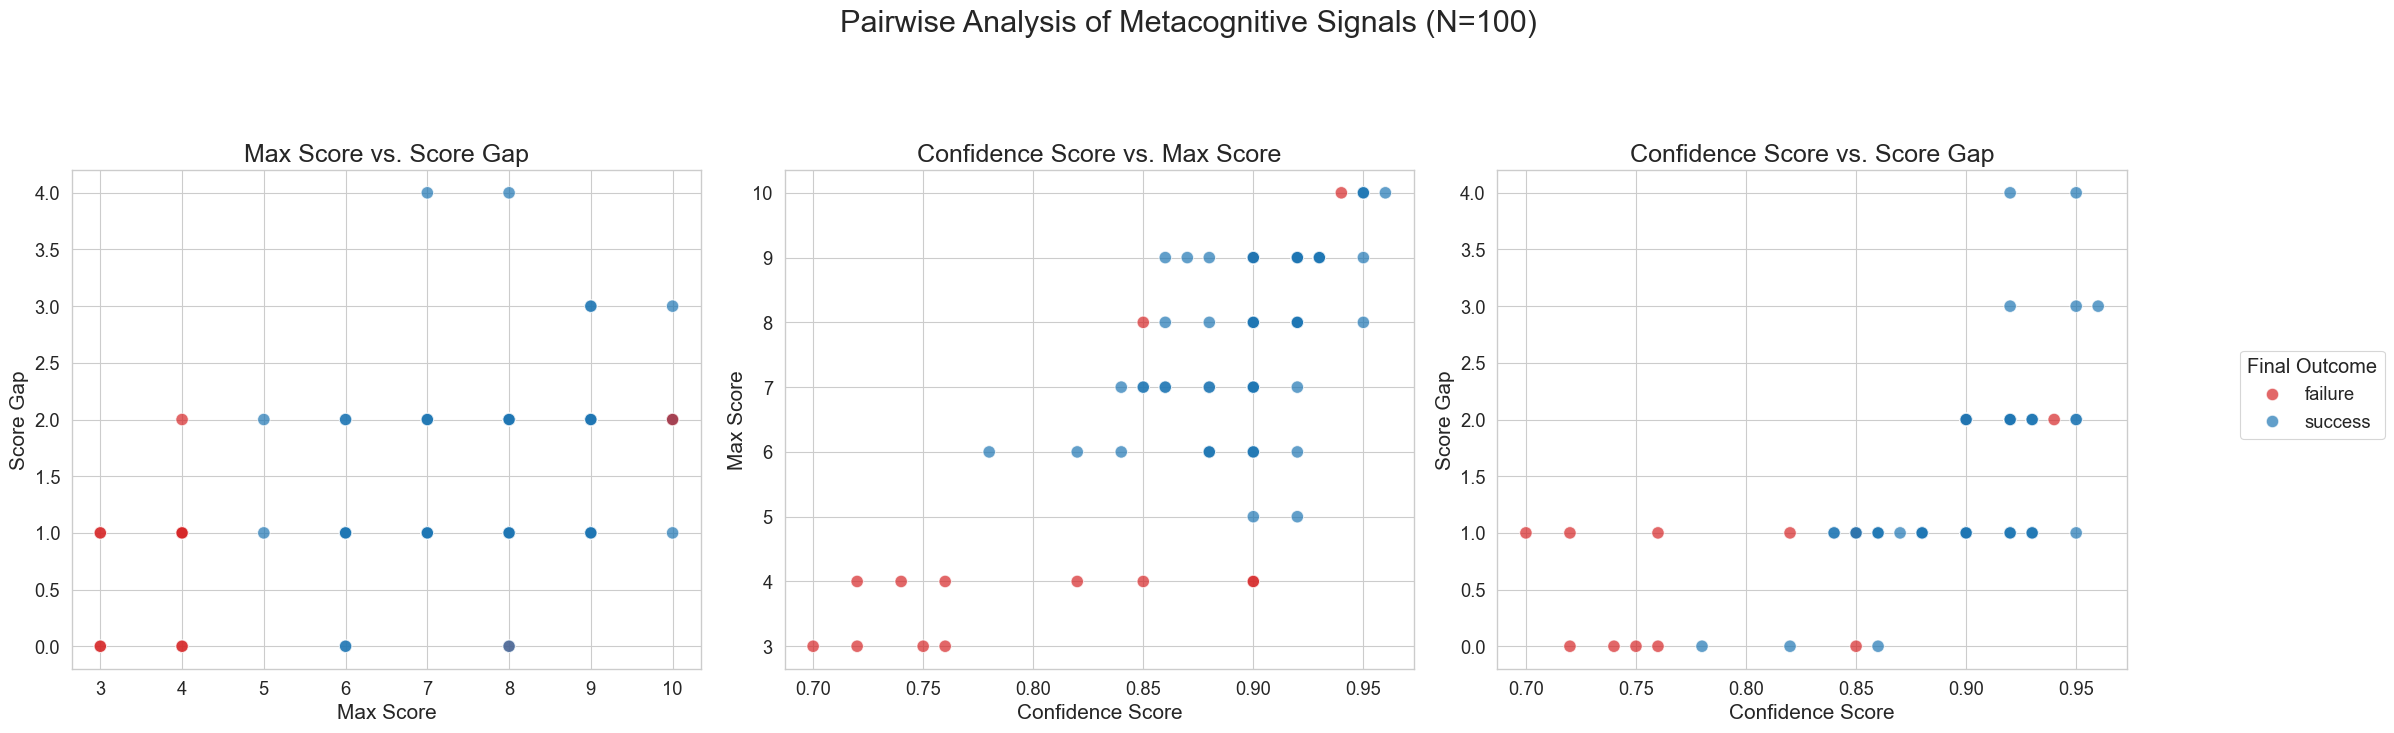

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob

# --- 1. 데이터 로드 및 통합 ---
results_dir = Path("../../results/outputs/validations/")
csv_files = list(results_dir.glob("validation_results_*.csv"))

all_dfs = []
print("데이터 로드 및 통합 시작...")
if not csv_files:
    print("오류: CSV 파일을 찾을 수 없습니다. 경로를 확인하거나 collect_validation_data.py를 먼저 실행하세요.")
else:
    for file_path in csv_files:
        try:
            df_task = pd.read_csv(file_path)
            task_name = file_path.stem.replace("validation_results_", "")
            df_task['task'] = task_name
            all_dfs.append(df_task)
            print(f"'{file_path.name}' ({len(df_task)} 행) 로드 완료. 태스크: '{task_name}'")
        except Exception as e:
            print(f"오류: '{file_path.name}' 파일을 로드하는 중 오류 발생: {e}")

# --- 2. 데이터 처리 및 그래프 생성 ---
if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"\n--- 데이터 통합 성공: 총 {len(df)}개 데이터 ---")
    
    # 데이터 타입 변환
    df['max_score'] = pd.to_numeric(df['max_score'], errors='coerce')
    df['score_gap'] = pd.to_numeric(df['score_gap'], errors='coerce')
    df['confidence_score'] = pd.to_numeric(df['confidence_score'], errors='coerce')
    
    # [수정] NaN 값을 제거하는 대신 0으로 채워서 모든 데이터를 포함시킴
    fill_values = {'max_score': 0, 'score_gap': 0, 'confidence_score': 0}
    df.fillna(value=fill_values, inplace=True)

    # 논문 품질에 적합한 스타일 설정
    sns.set_theme(style="whitegrid", context="paper", font_scale=1.5)
    plt.rcParams['font.family'] = 'sans-serif'

    # 1x3 subplot을 생성하여 3개의 그래프를 나란히 그립니다.
    fig, axes = plt.subplots(1, 3, figsize=(24, 7))
    total_n = len(df)
    fig.suptitle(f'Pairwise Analysis of Metacognitive Signals (N={total_n})', fontsize=22, y=1.05)

    # 그래프 1: Max Score vs. Score Gap
    sns.scatterplot(
        data=df, x='max_score', y='score_gap', hue='final_outcome',
        palette={'success': '#1f77b4', 'failure': '#d62728'}, alpha=0.7, ax=axes[0], s=80
    )
    axes[0].set_title('Max Score vs. Score Gap', fontsize=18)
    axes[0].set_xlabel('Max Score', fontsize=15)
    axes[0].set_ylabel('Score Gap', fontsize=15)
    axes[0].legend().set_visible(False)

    # 그래프 2: Confidence Score vs. Max Score
    sns.scatterplot(
        data=df, x='confidence_score', y='max_score', hue='final_outcome',
        palette={'success': '#1f77b4', 'failure': '#d62728'}, alpha=0.7, ax=axes[1], s=80
    )
    axes[1].set_title('Confidence Score vs. Max Score', fontsize=18)
    axes[1].set_xlabel('Confidence Score', fontsize=15)
    axes[1].set_ylabel('Max Score', fontsize=15)
    axes[1].legend().set_visible(False)

    # 그래프 3: Confidence Score vs. Score Gap
    sns.scatterplot(
        data=df, x='confidence_score', y='score_gap', hue='final_outcome',
        palette={'success': '#1f77b4', 'failure': '#d62728'}, alpha=0.7, ax=axes[2], s=80
    )
    axes[2].set_title('Confidence Score vs. Score Gap', fontsize=18)
    axes[2].set_xlabel('Confidence Score', fontsize=15)
    axes[2].set_ylabel('Score Gap', fontsize=15)
    axes[2].legend().set_visible(False)
    
    # 통합 범례를 그림 밖 오른쪽에 추가합니다.
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Final Outcome', loc='center right', bbox_to_anchor=(1.0, 0.5), borderaxespad=0.2)

    plt.tight_layout(rect=[0, 0, 0.9, 0.96])

    # 파일로 저장
    output_filename = '../../results/outputs/validations/graph/signal_pair_plots.png'
    plt.savefig(output_filename, dpi=300)
    print(f"\n그래프를 '{output_filename}' 파일로 저장했습니다.")
    plt.show()
    
else:
    print("\n데이터가 없어 그래프를 생성하지 못했습니다.")

In [ ]:
# 이 코드가 포함된 셀이 실행되지 않았습니다.
df['outcome_numeric'] = df['final_outcome'].apply(lambda x: 1 if x == 'success' else 0)
# 규칙 후보 정의
path_a_rule = (df['max_score'] >= 7) & (df['confidence_score'] >= 0.9)
path_c_rule = (df['max_score'] <= 4) | (df['confidence_score'] <= 0.75)

# 각 규칙에 해당하는 데이터 분리
df_path_a = df[path_a_rule]
df_path_c = df[path_c_rule]
df_path_b = df[~path_a_rule & ~path_c_rule] # A도 C도 아닌 나머지

# 각 경로의 통계 계산
df.head()
path_stats = {
    'A (확신 실행)': {
        'Count': len(df_path_a),
        'Success Rate (%)': df_path_a['outcome_numeric'].mean() * 100 if len(df_path_a) > 0 else 0
    },
    'B (주의 실행)': {
        'Count': len(df_path_b),
        'Success Rate (%)': df_path_b['outcome_numeric'].mean() * 100 if len(df_path_b) > 0 else 0
    },
    'C (메타인지 합성)': {
        'Count': len(df_path_c),
        'Success Rate (%)': df_path_c['outcome_numeric'].mean() * 100 if len(df_path_c) > 0 else 0
    }
}

stats_df = pd.DataFrame(path_stats).T
print("정의된 규칙에 따른 각 경로의 통계:")
stats_df

정의된 규칙에 따른 각 경로의 통계:


,Count,Success Rate (%)
A (확신 실행),6.0,100.000000
B (주의 실행),83.0,90.361446
C (메타인지 합성),11.0,0.000000
